<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Jeremy M. Hein

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [3]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>



### [30 points] Problem 1: Gambling With A Peg Legged Pirate:

You're a time traveling data scientist, and have traveled way back to the year 1654. Immediately upon arriving you're picked up by a bunch of pirates, and made to join a pirate crew. When the pirates realize that you're immensely knowledgable about probabilities and statistics, they promote you to be their captain! You rename the ship to be the "Certain Probability of Death", and set out upon the high seas. After a few days of sailing you come upon another band of buccaneers in their ship. Their captain, Peg Leg Pascal Fermat, challanges you to a gambling game, but you're not sure if you should play it. The rules for the game are below:

* You and Peg Leg Pascal Fermat will take turns repeatedly rolling a 20 sided die. The die has values 1 - 20 on it.


* **On your turn, the rules are as follows:**
1. If you roll the same value as what Peg Leg Pascal Fermat rolled on his last turn, you have to give him 5 dubloons. Do not perform any additional actions from the below list of rules if you rolled the same value as what Peg Leg Pascal Fermat rolled on his last turn. Otherwise:
2. If you roll an 8, Peg Leg Pascal Fermat will give you two gold dubloons.
3. If you roll a 7, Peg Leg Pascal Fermat will give you four gold dubloon.
4. If you roll a 15, you have to give Peg Leg Pascal Fermat one dubloon. 
5. If you roll a 1, the game ends.
6. If you roll any other value, nothing happens. 


* **On Peg Leg Pascal Fermat's turn the rules are as follows:**
1. If Peg Leg Pascal Fermat rolls the same number as you did on your last turn, he then rolls a different 19 sided die. When he rolls again, if he rolls a 19, **you must pay him** 100 dubloons. If he rolls anything other than a 19, **he must pay you** the same number of dubloons as the value of the roll. E.g. If he rolls a 10, he gives you 10 dubloons, but if he rolls a 19 you give him 100 dubloons. When he rolls again, he does not perform any other rules from the below list.
2. If Peg Leg Pascal Fermat rolls a 2, he must give you one gold dubloon.
3. If Peg Leg Pascal Fermat rolls a 14, you must give him two dubloons.
4. If Peg leg Pascal Fermat rolls a 17, you must give him three dubloons.
5. If Peg Leg Pascal Fermat rolls a 1, the game ends.

6. If Peg Leg Pascal Fermat rolls a 3, he takes off his peg leg, and gives you the leg. Who knows... Maybe it will be usefull if you lose your leg? 
7. If Peg Leg Pascal Fermat rolls a 3 and he has already given you his peg leg, he must give you 3 dubloons. 
8. If he rolls any other values, nothing happens.
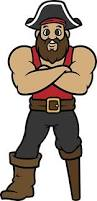

**Part A:** Without doing any extensive math or simulations, predict whether this game will result in your making or loosing money. Would you play it? Any logical non-empty answer will get credit here, so don't worry about if your prediction is actually right.

**Response:**

I predict I would lose money, and would choose not to play.  Although the probability that Peg Leg Pascal Fermat rolls the same number I did, and then also rolls a 19 is likely relatively low, it's still possible and 100 dubloons seems like a lot to lose compared with the other amounts that I could potentially win.  That's a risk I wouldn't want to take.

**Part B:** Luckily, when you time traveled back to 1654, you brought your laptop with you! Use Python to simulate 10,000 games following the above rules. Record your winnings or losings for each game in an array. Record the games in which you lost money with a negative value (amount you lost), and games in which you won money with a positive value (amount you won). Assume you always go first. You may write multiple functions or use multiple jupyter notebook cells to write your code, how you structure it is up to you. You may use any Numpy or Pandas functions you find useful, but may not import any additional libraries. Calculate the median amount you win or lose, and report it in markdown below. Based on the median value, would you play the game?

In [3]:
def game():
    
    #Die as np arrays
    die_20 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    die_19 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
    
    #keep track of win / loss amount and variables for rolls
    total = 0
    roll1 = 25
    roll2 = 26
    roll19 = 0
    count3 = 0
    
    #play game until someone rolls a 1
    while roll1 != 1 and roll2 != 1:
    
        #Jeremy's turn
        roll1 = np.random.choice(die_20)
        
        #if roll same as Peg Leg, -5
        if roll1 == roll2:
            total -= 5
            
        #if roll 8, +2 
        elif roll1 == 8:
            total += 2
            
        #if roll 7, +4
        elif roll1 == 7:
            total += 4
            
        #if roll 15, -1
        elif roll1 == 15:
            total -= 1
        
        #break if roll 1
        elif roll1 == 1:
            break
        
        #Peg Leg Pascal Fermat's turn
        roll2 = np.random.choice(die_20)
        
        #If roll = Jeremys roll, roll 19-sided die and increment as appropriate
        if roll2 == roll1:
            roll19 =  np.random.choice(die_19)
            if roll19 == 19:
                total -= 100
            else:
                total += roll19
            
        #if roll 2, +1
        elif roll2 == 2:
            total += 1
            
        #if roll 14, -2
        elif roll2 == 14:
            total -= 2
            
        #if roll 17, -3
        elif roll2 == 17:
            total -= 3
            
        #if roll 3, increment count and +3 if count > 1
        elif roll2 == 3:
            count3 += 1
            if count3 > 1:
                total +=3
    
    #return the total
    return total

def game_sim(n):
    
    #run sims for n
    mySims = np.array([game() for ii in range(n)])
    median = np.median(mySims) #calculate median
    mean = np.mean(mySims) #calculate mean
    print ("Median winnings is: ", median) #print median
    print ("Mean winnings is: ", mean) #print mean
    return mySims; #return the array
    
sims = game_sim(10000) #run game sim
        

Median winnings is:  0.0
Mean winnings is:  0.6793


**Code Explanation:**

def game() tracks a running total based on rolls from me and rolls from Peg Leg Pascal Fermat based on the rules outlined above.  The function will run until someone rolls a 1, and will return the total after the game has ended.  game_sim runs game "n" times and stores the totals in a Numpy array.  It then calculates the median and mean using Numpy functions and prints both the the screen.  Finally, it returns the array of simulations for the next parts of the question.

**Question Response:**

The median value of my simulations is zero.  Based solely on this data point, I would play the game.  I would play the game becuase although it seems I may not win or lose anything, I would need some entertainment while sailing the open seas!

**Part C:** Calculate a Tukey 5 Number Summary and the mean value for your array of simulated winnings/losings. Based on this information would you play the game? Are any of these metrics more useful than others? Which metrics would be important if we were deciding to play a single game? Which would be more important if we were deciding to play a very large number of games? 

In [4]:
# Tukey 5 Num Sum:
# Min value
# Q1
# Q2
# Q3
# Max Value

sorts = np.sort(sims) #sort array of simulations
minimum = np.min(sorts) # calculat min

# First quartile (Q1) - median of top 5000 since entries is 10000
Q1 = np.median(sorts[:5000])

# Median is Q2
median = np.median(sorts) #calculate median
  
# Third quartile (Q3)  - median of bottom 5000
Q3 = np.median(sorts[5000:]) 

maximum = np.max(sorts) #calculate max
mean = np.mean(sorts) #calculate mean

#print stats
print ("Tukey 5 Number Summary:")
print ("Min: ", minimum)
print ("Q1: ", Q1)
print ("Median: ", median)
print ("Q3: ", Q3)
print ("Max: ", maximum)
print()
print ("Mean is: ", mean)

Tukey 5 Number Summary:
Min:  -205
Q1:  -2.0
Median:  0.0
Q3:  6.0
Max:  94

Mean is:  0.6793


**Response:**

Given the median is zero and the mean is slightly positive, I would play the game.  Understanding there is a wide range of possible outcomes (min of -213 and max of 73), the median will be less affected by outlier values and may be a more useful metric. The minimum and maximum would be more important in deciding to only play a single game, so I could have a sense of the range of possible outcomes.  The median would also be important here for the same reasons mentioned previously.  If we were deciding to play a large number of games, I would rely more on the mean.  The mean and the median are relatively close, which is an indication the data is largely normally distributed.  Understanding this, the mean is likely a better representation of central tendency over a large number of games.

**Part D:** After seeing the numbers in **Part C**, we decide to play a few games with Peg Leg Pascal Fermat (You might want to double check you simulation in **Part B** if the mean value doesn't come out slightly positive in **Part C**). You play 10 rounds and it seems like he might be cheating. You just can't win, and you're losing a ton of money! Maybe Peg Leg Pascal Fermat has a loaded die. However, you've found a .csv file buried in the sand. It has the winnings and losings of another player who was playing the same game against Peg Leg Pascal Fermat. We'll use this information to figure out if he is cheating. Read in the file`Pascal_Fermat_Games.csv`. Each row contains the results of a game that another player played against Peg Leg Pascal Fermat. It's a little bit dirty (after all this .csv was buried in the sand). Perform the following cleaning tasks:
1. Read in the .csv. If you have any trouble reading in the file, open it in a text editor and take a look at it. You might find the pandas documentation for the `read_csv` function and some of the optional arguments useful. 
2. Look at the two columns. One of them is useless. Drop the useless one.
3. Drop any strings of non-integer data.
3. Check to see if any of our values are floating point values. If there are any, drop them. 
5. Drop any values that are over 1000 or under -1000. 
6. Print the number of rows remaining.

After doing all that, you should have 9661 rows of data left.

In [5]:
# Read in file using ";" as the delim
file_path = "C:/Users/jerem/OneDrive/Documents/CSCI3022/Pascal_Fermat_Games.csv"
df = pd.read_csv(file_path, sep=";") #define datafram
df = df.drop(columns = ['Game Number']) #redundant column
df = df.astype(str) #convert to type string
df = df[~df.Winnings.str.contains("\.")] #drop any rows with a decmial value

df = df.apply(pd.to_numeric, errors="coerce") #convernt to numeric - non-numeric values to NaN
boolSeries = pd.isnull(df["Winnings"]) # creates a mask of T/F values based on Winnings column
df[boolSeries] # displays only rows in which "Winnings" == NaN
df = df.dropna(subset=["Winnings"]) #drop NaN rows

dfClean= df[df["Winnings"] >= -1000] # keep only rows >= -1000
dfClean= dfClean[dfClean["Winnings"] <= 1000] #keep only rows <= 1000

dfClean.describe()

,Winnings
count,9661.000000
mean,-15.747956
std,52.943518
min,-476.000000
25%,-11.000000
50%,0.000000
75%,9.000000
max,162.000000


**Part E:** Create a density histogram with both our siumulated data and our data from the `Pascal_Fermat_Games.csv` file overlayed on the same set of axes. Ensure your plot is legible and contains all of the common labels/titles/etc. Make sure you use enough bins to make the data easly visible. To make the graph easy to read, it's fine to limit the x range to avoid showing large areas with very few occurances of data. This problem will largely be graded based on how nice and easy to interpret your plot is, so do your best.

One Annoying thing about matplotlib is how small the font on the titles/axis labels/etc. Do some googling and figure out how to change the matplotlib font sizes. ***CITE YOUR SOURCES IF YOU USE ANYTHING OTHER THAN THE MATPLOTLIB DOCUMENTATION PAGES.***. Change the axes label font to be 14pt, the x-tick and y-tick font to be 8pt, the title font to be 16pt, and the legend font to be 12pt. Isn't that nicer? 

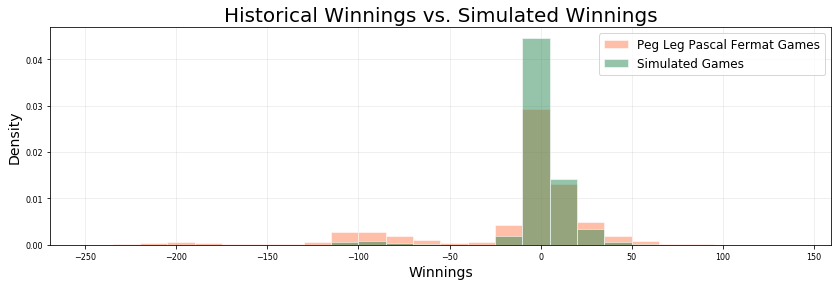

In [17]:
# Your code here.

dfSimulated = pd.DataFrame(sims)
dfSimulated.columns =['Winnings']

my_bins = range(-250,150,15)
# Initialize figure 
fig, ax = plt.subplots(figsize=(14,4))


# Plot histogram with custom colors and adding density
mycolor = np.array([30,30,120])/255 #RGB values
dfClean.hist(column="Winnings", ax=ax, alpha = 0.5, bins=my_bins, facecolor="coral", edgecolor="white", density = True, label = "Peg Leg Pascal Fermat Games")
dfSimulated.hist(column="Winnings", ax=ax, alpha = 0.5, bins=my_bins, facecolor="seagreen", edgecolor="white", density = True, label = "Simulated Games")

# Add a title
ax.set_title("Historical Winnings vs. Simulated Winnings", fontsize=20)

# Add axis labels 
ax.set_xlabel("Winnings", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

# Add legend
ax.legend(loc = 'upper right', fontsize=12)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(8)

**Part F:** Print out the Tukey 5 number summary of the data from the .csv file. Based on this and the histogram above, make an argument as to whether Peg Leg Pascal Fermat is cheating or not.

In [103]:
# Your code here.
dfClean.describe()

,Winnings
count,9661.000000
mean,-15.747956
std,52.943518
min,-476.000000
25%,-11.000000
50%,0.000000
75%,9.000000
max,162.000000


**Response:**

In comparing our two datasets, we can notice a handful of differences.  First, our simulated games have a much higher density clustered around the median / mean values as compared to Peg Leg Pascal's historical data.  In addition, Peg Leg Pacal's data has a higher density of results around the -100 to -50 area.  We can also see that the mean winnings in Peg Leg Pascal's data is -15.7 as compared to the 0.68 in our simluated data.   The minimum and the maximum values are lower and higher, respectively as well.

Given our sample size is quite large in both datasets, we would expect the distribution of results to largely resemble each other.  It's clear from the data that the higher density of results in the -100 to -50 winning range in Peg Leg Pascal's historical data is driving the mean value to be substantially lower than the mean value in our simulated data.  The only explanation for the discrepency is that Peg Leg Pascal Fermat is indeed cheating.  Looking back at the rules, if Peg Leg Pascal Fermat has to roll a 19-sided die and he rolls a 19, his opponent must pay him 100 dubloons.  I would hypothesize that it is this die that is loaded toward rolling a 19.  This would explain both the discrepency in distribution of data as well as the specific range where we see discrepency.

**Part G:** In this problem you were transported back to the year 1654. Find out why the year 1654 is important in the fields of mathematics and data science. 

In 1654, Blaise Pascal and Pierre de Fermat collaborated on a "gamblers dispute" regarding a dice game which eventually led to the mathematical theory of probabilities and the concept of expected value.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

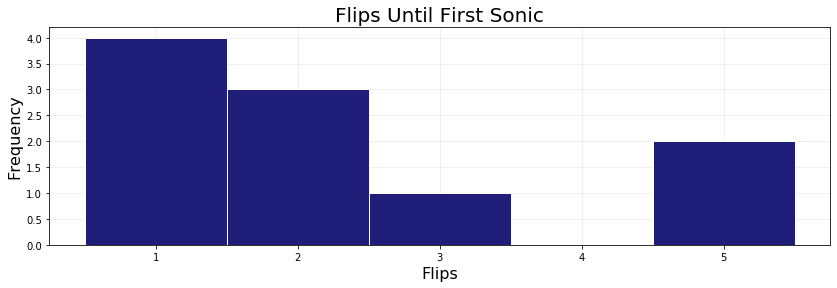

In [42]:
# Your code here.
df = pd.read_csv("C:/Users/jerem/OneDrive/Documents/CSCI3022/flipadelphia.csv", header = None, usecols=[0], names=['Flips'])

my_bins = [0.5,1.5,2.5,3.5,4.5,5.5]

# Initialize figure 
fig, ax = plt.subplots(figsize=(14,4))

# Plot histogram with custom colors
mycolor =np.array([30,30,120])/255 #RGB values
df.hist(column="Flips", ax=ax, bins=my_bins, facecolor=mycolor, edgecolor="white")

# Add a title
ax.set_title("Flips Until First Sonic", fontsize=20)

# Add axis labels 
ax.set_xlabel("Flips", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The distribution in Amy's experiment is a Geometric Distribution.

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

In [44]:
#P(X = 1 | ps = 0.5)
px1 = 0.5*(1-0.5)**0.0

#P(X = 2 | ps = 0.5)
px2 = 0.5*(1-0.5)**1.0

#P(X = 3 | ps = 0.5)
px3 = 0.5*(1-0.5)**2.0

#P(X = 4 | ps = 0.5)
px4 = 0.5*(1-0.5)**3.0

#P(X = 5 | ps = 0.5)
px5 = 0.5*(1-0.5)**4.0

#P(data | ps = 0.5)
pData = (px1**4) * (px2**3) * (px3**1) * (px4**0) * (px5**2) 


print("P(X = 1 | ps = 0.5) = ", px1)
print("P(X = 2 | ps = 0.5) = ", px2)
print("P(X = 3 | ps = 0.5) = ", px3)
print("P(X = 4 | ps = 0.5) = ", px4)
print("P(X = 5 | ps = 0.5) = ", px5)
print("P(data | ps = 0.5) = {:.23f}".format(pData))

P(X = 1 | ps = 0.5) =  0.5
P(X = 2 | ps = 0.5) =  0.25
P(X = 3 | ps = 0.5) =  0.125
P(X = 4 | ps = 0.5) =  0.0625
P(X = 5 | ps = 0.5) =  0.03125
P(data | ps = 0.5) = 0.00000011920928955078125


For a geometric distribution, $P(X = k) = (1 - p)^{(k - 1)} * p$

$P(X=1 \mid p_S=0.5) = (1 - 0.5)^0 * 0.5 = 1 * 0.5 = 0.5$

$P(X=2 \mid p_S=0.5) = (1 - 0.5)^1 * 0.5 = 0.5 * 0.5 = 0.25$

$P(X=3 \mid p_S=0.5) = (1 - 0.5)^2 * 0.5 = 0.25 * 0.5 = 0.125$

$P(X=4 \mid p_S=0.5) = (1 - 0.5)^3 * 0.5 = 0.125 * 0.5 = 0.0625$

$P(X=5 \mid p_S=0.5) = (1 - 0.5)^4 * 0.5 = 0.0625 * 0.5 = 0.03125$

Each trial is independent, and in our data we have:

$n_1 = 1$ 

$n_2 = 5$

$n_3 = 1$

$n_4 = 5$

$n_5 = 2$

$n_6 = 2$

$n_7 = 3$

$n_8 = 2$

$n_9 = 1$

$n_{10} = 1$

So the probability we observe our entire data set is equal to:

$P(data) = P(X = 1)^4 * P(X = 2)^3 * P(X = 3)^1 * P(X = 4)^0 * P(X = 5)^2 $

$= 0.5^4 * 0.25^3 * 0.125^1 * 0.0625^0 * 0.03125^2 = 0.00000011920928955078125$

**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

Text(0.5, 1.0, 'Posterior Distribution')

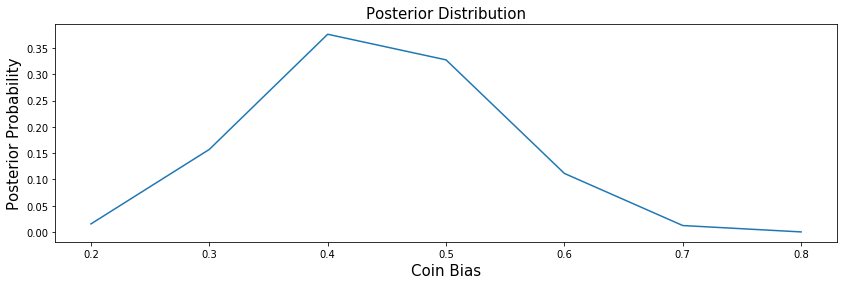

In [61]:
# Calculates P(data | ps)
def given(ps):
    px1 = ps*(1-ps)**0
    px2 = ps*(1-ps)**1
    px3 = ps*(1-ps)**2
    px4 = ps*(1-ps)**2
    px5 = ps*(1-ps)**4
    pData = (px1**4)*(px2**3)*(px3**1)*(px4**0)*(px5**2)
    return pData

# Calculate P(ps | data) using Bayes Theroem
def ps_given_data(ps):
    numerator = given(ps) * (1/7)
    denomenator = ((given(0.2)*1/7) + (given(0.3)*1/7) + (given(0.4)*1/7) + (given(0.5)*1/7) + (given(0.6)*1/7) + (given(0.7)*1/7) + (given(0.8)*1/7))
    return numerator / denomenator 

p2 = ps_given_data(0.2)
p3 = ps_given_data(0.3)
p4 = ps_given_data(0.4)
p5 = ps_given_data(0.5)
p6 = ps_given_data(0.6)
p7 = ps_given_data(0.7)
p8 = ps_given_data(0.8)

X = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
Y = np.array([p2, p3, p4, p5, p6, p7, p8])

plt.figure(figsize=(14,4))
plt.plot(X, Y)
plt.xlabel("Coin Bias", fontsize = 15)
plt.ylabel("Posterior Probability", fontsize = 15)
plt.title("Posterior Distribution", fontsize = 15)

By Bayes Theorem:

$P(ps \mid data) = \frac{P(data \mid ps)P(ps)}{P(data \mid 0.2)P(0.2) + P(data \mid 0.3)P(0.3)  + P(data \mid 0.4)P(0.4) + P(data \mid 0.5)P(0.5) + P(data \mid 0.6)P(0.6) + P(data \mid 0.7)P(0.7) + P(data \mid 0.8)P(0.8)}$

From our graph, we can see that the most probable value for the bias, $p_s$ is 0.4. The posterior distribution is maximized at 0.4, so this is the maximum posteriori - and yes, it sounds very, *very* fancy.

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

For $P(p_s = p)$ to be a valid PMF, we need to satisfy:  $\sum_p P(p_s = p) = 1$

$= m(0.2) + m(0.3) + m(0.4) + m(0.5) + m(1 - 0.6) + m(1 - 0.7) + m(1 - 0.8) = 1$

$= m(0.2 + 0.3 + 0.4 + 0.5 + (1 - 0.6) + (1 - 0.7) + (1 - 0.8)) = 1$

$= m(\frac{2}{10} + \frac{3}{10} + \frac{4}{10} + \frac{5}{10} + \frac{4}{10} + \frac{3}{10} + \frac{2}{10}) = 1$

$= m(\frac{23}{10}) = 1$

$m = \frac{10}{23}$

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

**Uniform Prior Distribution:** Represents that our prior knowledge of having a given bias is equally probable at $\frac{1}{7}$. 

**Triangular Prior Distribution:** Represents that our prior knowledge of having a given bias is not equally probable.  In our case, as shown above, $P(p_s \le 0.5)$ = $\frac{10}{23} * p_s$ and $P(p_s \ge 0.5)$ is $\frac{10}{23} * (1 - p_s).$

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

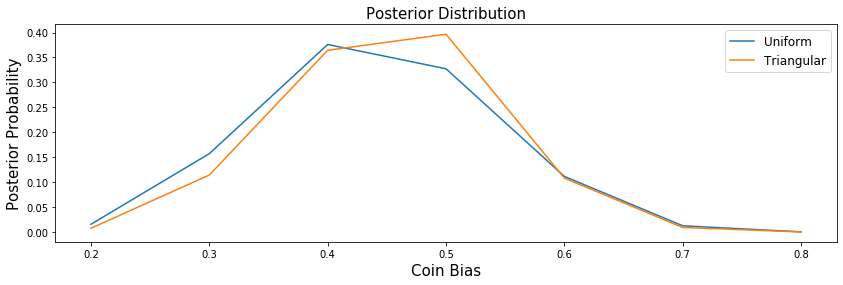

In [62]:
def triangular(ps):
    if(ps <= 0.5):
        return (10/23) * ps
    else:
        return (10/23)* (1-ps)

# Calculate P(ps | data) using Bayes Theroem
def ps_given_triangular(ps):
    numerator = given(ps) * triangular(ps)
    denomenator = ((given(0.2)*triangular(0.2)) + (given(0.3)*triangular(0.3)) + (given(0.4)*triangular(0.4)) + (given(0.5)*triangular(0.5)) + (given(0.6)*triangular(0.6)) + (given(0.7)*triangular(0.7)) + (given(0.8)*triangular(0.8)))
    return numerator / denomenator 

p_2 = ps_given_triangular(0.2)
p_3 = ps_given_triangular(0.3)
p_4 = ps_given_triangular(0.4)
p_5 = ps_given_triangular(0.5)
p_6 = ps_given_triangular(0.6)
p_7 = ps_given_triangular(0.7)
p_8 = ps_given_triangular(0.8)

Y2 = np.array([p_2, p_3, p_4, p_5, p_6, p_7, p_8])

plt.figure(figsize=(14,4))
plt.plot(X, Y, label = "Uniform")
plt.plot(X, Y2, label = "Triangular")
plt.xlabel("Coin Bias", fontsize = 15)
plt.ylabel("Posterior Probability", fontsize = 15)
plt.title("Posterior Distribution", fontsize = 15)
plt.legend(fontsize = 12)

From our graph, we can see that the most probable value for the bias under the Uniform Prior Distribution, $p_s$ = 0.4 and the most probable value for the bias under the Triangular Prior Distribution, $p_s$ = 0.5